C:\Users\inoke\AppData\Local\Temp\ipykernel_20272\4059869819.py:28: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  years_mean = sp.mean(years)
C:\Users\inoke\AppData\Local\Temp\ipykernel_20272\4059869819.py:29: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  values_mean = sp.mean(values)
C:\Users\inoke\AppData\Local\Temp\ipykernel_20272\4059869819.py:37: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  MXY = sp.mean(XY)


Index([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970],
      dtype='int32')
[ 7.4  8.6  7.8  7.7  8.4  9.9  8.4 11.1 10.4 10.9 10.7 10.9  8.3 11.4
  9.5 13.7 12.1 14.  13.2 15.6]


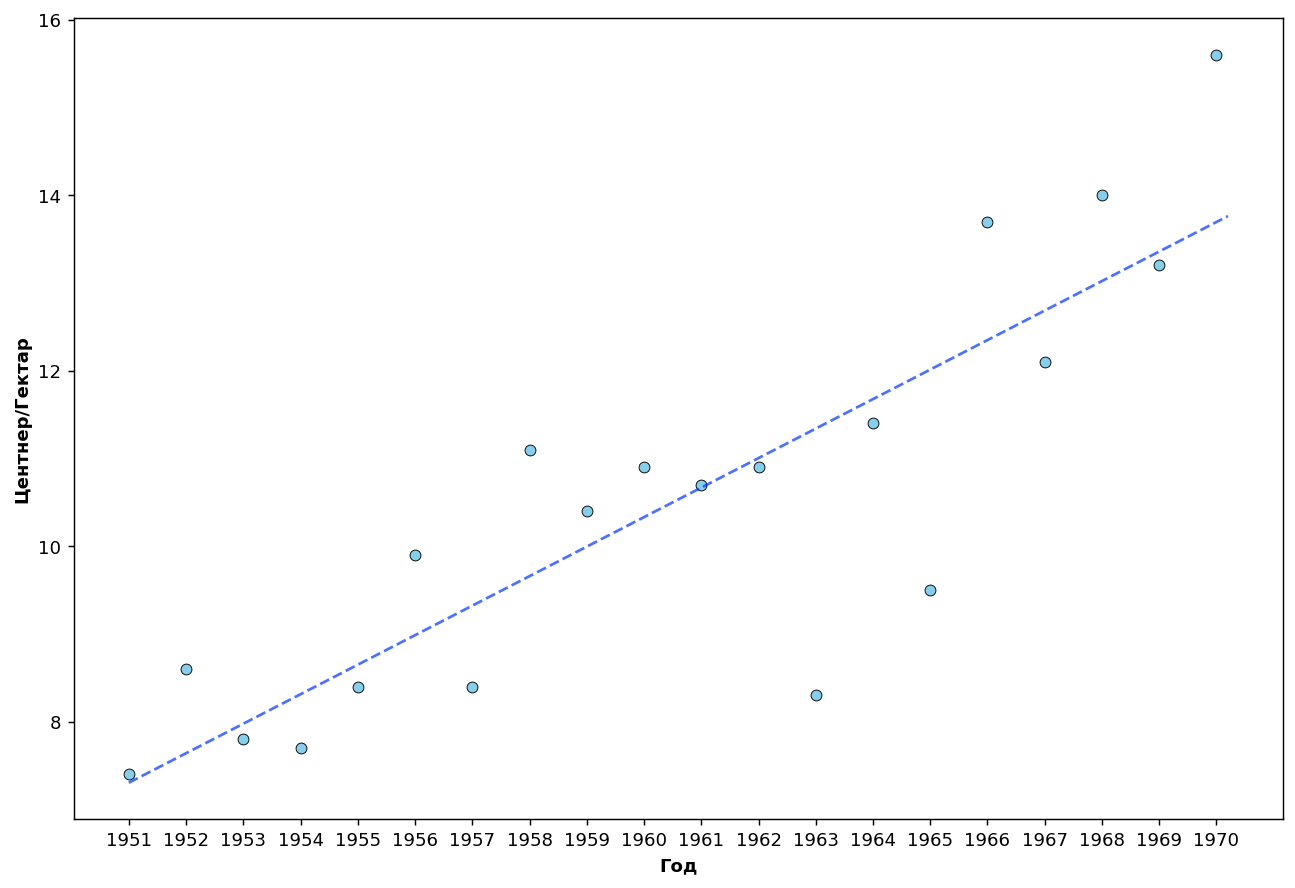

In [1]:
import pandas as pd 
from pandas import DataFrame, Series
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
from scipy import stats 



data = Series(data=np.array([7.4, 8.6, 7.8, 7.7, 8.4, 9.9, 8.4, 11.1, 10.4, 10.9, 10.7, 10.9, 8.3, 11.4, 9.5, 13.7, 12.1, 14, 13.2, 15.6]), 
              index=np.arange(1951, 1971, 1),
              name = 'Урожайность')

fig, ax = plt.subplots(figsize = (12,8), dpi=130, label='Тренд урожаность зерновых культур в СССР с 1950 по 1970 года')
ax.scatter(data.index, data.values, c = 'skyblue', edgecolors='black', linewidths=0.5)
ax.set_xticks(np.arange(1951, 1971, 1))
ax.set_xlabel('Год', fontdict={'weight': 'bold'})
ax.set_ylabel('Центнер/Гектар', fontdict={'weight': 'bold'})

corr, p_val = sp.stats.pearsonr(data.index, data.values)

years = list(data.index)
values = list(data.values)

years_std = stats.tstd(years)
values_std = stats.tstd(values)

years_mean = sp.mean(years)
values_mean = sp.mean(values)


x = np.arange(1951, 1970.2, 0.2)
ax.plot(x, corr*(values_std/years_std)*(x-years_mean)+values_mean, color=(0,0.2,1), linestyle = '--', alpha=0.7)


XY = data.index*data.values
MXY = sp.mean(XY)


print(data.index)
print(data.values)


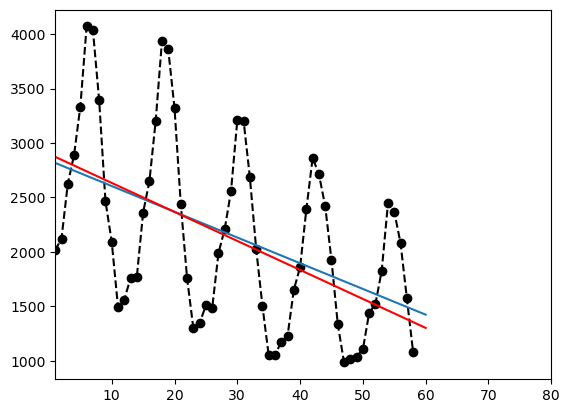

In [2]:
# production = {
#     'Январь': [2015,1759,1510, 1172,1038],
#     'Февраль': [2123, 1773, 1484, 1226, 1104],
#     'Март': [2624,2361,1988,1651,1439],
#     'Апрель': [2891, 2649, 2211, 1859, 1521],
#     'Май': [3335, 3203, 2559, 2392, 1827],
#     'Июнь': [4071, 3936, 3209, 2864, 2446],
#     'Июль': [4040,3861,3204,2714,2369],
#     'Август': [3392, 3321, 2687, 2420, 2081],
#     'Сентябрь': [2467, 2438, 2031, 1925, 1577],
#     'Октябрь': [2092, 1760, 1506, 1338, 1081],
#     'Ноябрь': [1494, 1299, 1050, 984, np.nan],
#     'Декабрь': [1562, 1345, 1054, 1020, np.nan],
# }

# milk_df = DataFrame(production)
# milk_df = milk_df.T
# milk_df.columns = np.arange(1992, 1997, 1)


# coeff = (milk_df.loc['Октябрь',:].values/milk_df.loc['Ноябрь',:].values)[:4].mean()
# seconds_coeff = (milk_df.loc['Декабрь',:].values/milk_df.loc['Ноябрь',:].values)[:4].mean()

### Интерполяция Данных:
# milk_df.loc['Ноябрь', 1996] = int(milk_df.loc['Октябрь', 1996]/coeff)
# milk_df.loc['Декабрь', 1996] = int(milk_df.loc['Ноябрь', 1996]*seconds_coeff)



hddd = DataFrame(
    data=[2015, 2123, 2624, 2891, 3335, 4071, 4040, 3392, 2467, 2092, 1494, 1562,
          1759, 1773, 2361, 2649, 3203, 3936, 3861, 3321, 2438, 1760, 1299, 1345,
          1510, 1484, 1988, 2211, 2559, 3209, 3204, 2687, 2031, 1506, 1050, 1054,
          1172, 1226, 1651, 1859, 2392, 2864, 2714, 2420, 1925, 1338, 984, 1020,
          1038, 1104, 1439, 1521, 1827, 2446, 2369, 2081, 1577, 1081],
    index= np.arange(1,59,1)
)

from itertools import chain

Y = list(chain.from_iterable(list(hddd.values.T)))
X = np.arange(1,59,1)


### подсчет мат ожиданий и стандартных отклонений
MX = np.mean(X)
MY = np.mean(Y)
stdX = np.std(X)
stdY = np.std(Y)

### корреляция (тренд) величин
corr, pval = sp.stats.pearsonr(X,Y)

### Уравнение линейной регрессии и временной тренд из книги
x_points = np.arange(0,60.2, 0.2)
trend = corr*(stdY/stdX)*(x_points-MX)+MY
book_trend = 2899.9 - 26.64*x_points

coeff = corr*(stdY/stdX)
additional = -corr*(stdY/stdX)*MX+MY


filler_data = []

for i in range(1, 59):
    filler_data.append(hddd[0][i]/(additional-coeff*i))

new_hddd = DataFrame(data=filler_data, index= np.arange(1,59,1))



def linear_regression(value):
    return coeff*value+additional

plt.plot(hddd, linestyle='--', marker='o', color = 'black')
plt.plot(x_points, trend)
plt.plot(x_points, book_trend, color='red')
plt.xlim(1, 80)
plt.show()


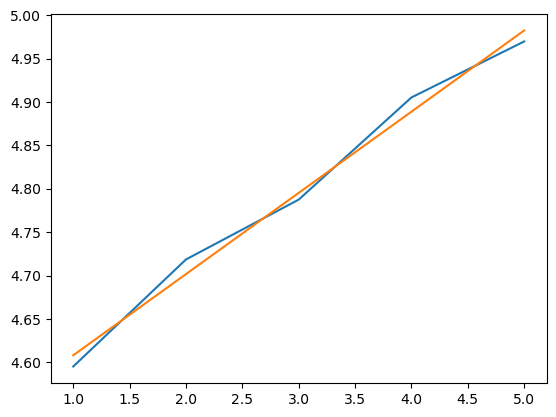

In [3]:
data=[np.log(99), np.log(112), np.log(120), np.log(135), np.log(144)]
ser = Series(data=data, index=np.arange(1,6,1))
plt.plot(ser)

corr, pval = sp.stats.pearsonr(ser.index, ser.values)

x_points = np.arange(1,5.2, 0.2)
regression = corr*(np.std(ser.values)/np.std(ser.index))*(x_points-np.mean(ser.index))+np.mean(ser.values)
exp_regression = np.exp(regression)


plt.plot(x_points,regression)

In [4]:
df = DataFrame(
[
    [100,154], [118,123], [112,120], [97,213], [99,200], [103,187], [102,155],
    [132,100], [122,114], [121,115], [115,107], [117,176], [109, 143], [111,111],
],
columns=['Уровень Интеллекта (IQ)', 'Время решеения логических задач в секундах'],
index=np.arange(1,15,1)
)
df.sort_values(by='Уровень Интеллекта (IQ)')

df.insert(1, 'Прорангированный уровень интеллекта', df['Уровень Интеллекта (IQ)'].rank())
df.insert(2, 'Прорангированное время решения задач', df['Время решеения логических задач в секундах'].rank())

Sum = ((df['Прорангированный уровень интеллекта']-df['Прорангированное время решения задач'])**2).sum()


spearmen_corr_coeff = 1 - (6*Sum)/(14**3-14)

spearmen_corr_coeff

-0.7582417582417582